In [1]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("decision_tree_data.xlsx")

df.head()


,Age,Salary,Purchased
0,22,25000,0
1,25,32000,0
2,35,40000,1
3,45,65000,1
4,52,80000,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        10 non-null     int64
 1   Salary     10 non-null     int64
 2   Purchased  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [4]:
df.describe()


,Age,Salary,Purchased
count,10.000000,10.000000,10.000000
mean,35.200000,47100.000000,0.600000
std,10.726913,19261.071852,0.516398
min,22.000000,25000.000000,0.000000
25%,26.000000,33000.000000,0.000000
50%,34.000000,40500.000000,1.000000
75%,43.750000,61750.000000,1.000000
max,52.000000,80000.000000,1.000000


In [5]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

X, y


(   Age  Salary
 0   22   25000
 1   25   32000
 2   35   40000
 3   45   65000
 4   52   80000
 5   23   28000
 6   40   52000
 7   29   36000
 8   48   72000
 9   33   41000,
 0    0
 1    0
 2    1
 3    1
 4    1
 5    0
 6    1
 7    0
 8    1
 9    1
 Name: Purchased, dtype: int64)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

X_train.shape, X_test.shape


((7, 2), (3, 2))

In [7]:
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=42
)


In [8]:
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_pred = model.predict(X_test)
y_pred


array([1, 0, 0])

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [11]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [12]:
joblib.dump(model, "decision_tree_model.pkl")
print("✅ Model saved successfully")


✅ Model saved successfully


In [13]:
loaded_model = joblib.load("decision_tree_model.pkl")

sample = pd.DataFrame([[30, 35000]], columns=["Age", "Salary"])
loaded_model.predict(sample)


array([0])

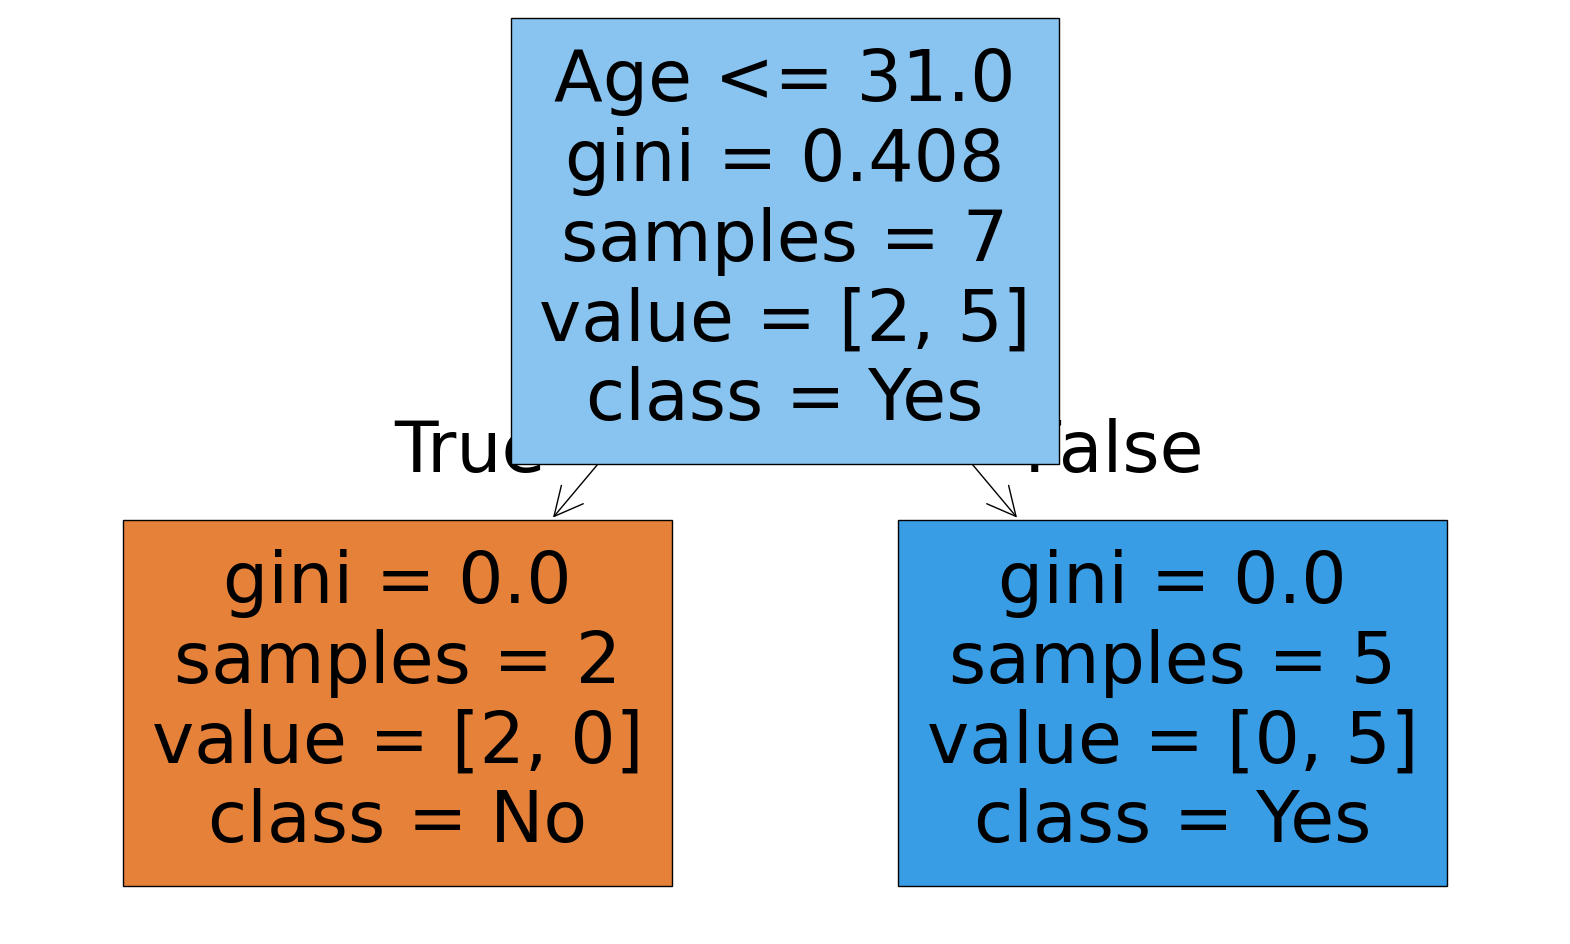

In [14]:
plt.figure(figsize=(20, 12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True
)
plt.savefig("decision_tree.png")
plt.show()
